In [1]:
#Importing libraries
import pandas as pd
import numpy as np
%matplotlib inline
from statsmodels.tsa.ar_model import AR, ARResults
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error

In [2]:
#Loading data
data = pd.read_csv('C:/Users/bhavi/OneDrive/Desktop/Data/Time_Series_Data/uspopulation.csv', 
                   index_col='DATE', 
                   parse_dates=True)

In [26]:
#Checking the data
data

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699
...,...
2018-08-01,327698
2018-09-01,327893
2018-10-01,328077


This is 8 years of data consist of 96 months.

8*12=96

In [4]:
#Changing the frequency of the data
data.index.freq = 'MS'

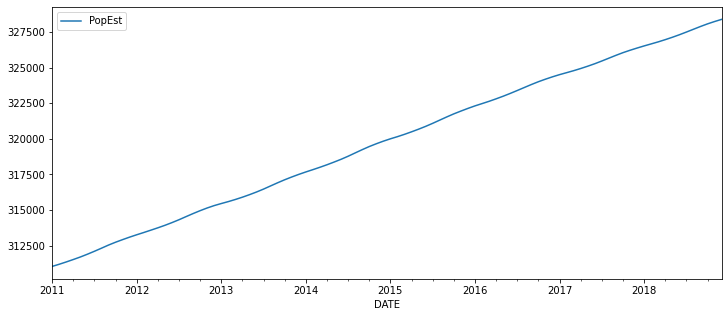

In [24]:
#Plotting the data
data.plot(figsize=(12,5));

The above plot is linear in nature

In [6]:
#Splitting train and test data
train = data[:84]
test = data[84:]
train.shape, test.shape

((84, 1), (12, 1))

In [7]:
#Creating AR model
model = AR(data['PopEst'])
AR_model = model.fit(maxlag=1)

In [8]:
#Checking summary of the model
AR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               AR Model Results                               
==============================================================================
Dep. Variable:                      P  -                  o                  p
Model:                          AR(1)   Log Likelihood                -435.164
Method:                          cmle   S.D. of innovations             23.612
Date:                Sat, 27 Mar 2021   AIC                              6.387
Time:                        20:31:47   BIC                              6.467
Sample:                    01-01-2011   HQIC                             6.419
                         - 12-01-2018                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        441.5537    154.022      2.867      0.004     139.676     743.432
L1.PopEst      0.9992      0.000   2074.493      0.000       0.998       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0008           +0.0000j            1.0008            0.0000
-----------------------------------------------------------------------------
"""

In [9]:
#Prediction on the model
start = len(train)
end = len(train)+len(test)-1
pred = AR_model.predict(start,end)
pred = pred.rename('AR1_Pred')

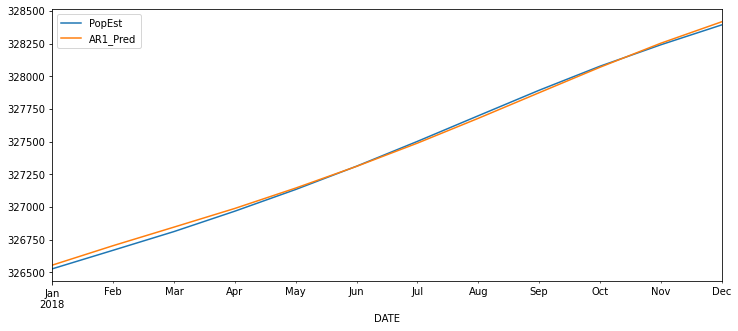

In [10]:
#Plotting the data
test['PopEst'].plot(figsize=(12,5), legend = True);
pred.plot(legend=True);

In [11]:
#Creating AR model
model = AR(data['PopEst'])
AR2_model = model.fit(maxlag=2)

In [12]:
#Checking summary of the model
AR2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               AR Model Results                               
==============================================================================
Dep. Variable:                      P  -                  o                  p
Model:                          AR(2)   Log Likelihood                -365.797
Method:                          cmle   S.D. of innovations             11.852
Date:                Sat, 27 Mar 2021   AIC                              5.030
Time:                        20:32:33   BIC                              5.138
Sample:                    01-01-2011   HQIC                             5.074
                         - 12-01-2018                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        138.3879     81.867      1.690      0.091     -22.068     298.844
L1.PopEst      1.8539      0.053     35.220      0.000       1.751       1.957
L2.PopEst     -0.8542      0.053    -16.241      0.000      -0.957      -0.751
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0024           +0.0000j            1.0024            0.0000
AR.2            1.1678           +0.0000j            1.1678            0.0000
-----------------------------------------------------------------------------
"""

In [13]:
#Prediction on the model
start = len(train)
end = len(train)+len(test)-1
pred2 = AR2_model.predict(start,end)
pred2 = pred2.rename('AR2_Pred')

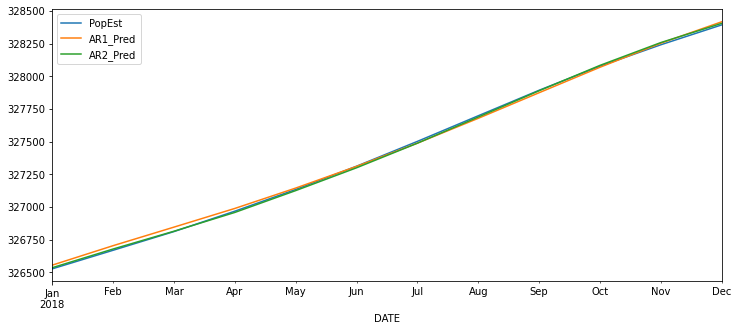

In [14]:
#Plotting the data
test['PopEst'].plot(figsize=(12,5), legend = True);
pred.plot(legend=True);
pred2.plot(legend=True);

In [15]:
#Finding optimal number of order
#Creating AR model
model_opt = AR(data['PopEst'])
AR_model_opt = model_opt.fit(ic='t-stat')

In [16]:
#Extracting best lags
AR_model_opt.params

const         84.885175
L1.PopEst      2.296674
L2.PopEst     -2.109518
L3.PopEst      1.429221
L4.PopEst     -1.259837
L5.PopEst      1.093852
L6.PopEst     -0.985774
L7.PopEst      1.066295
L8.PopEst     -0.858709
L9.PopEst      0.826672
L10.PopEst    -1.074975
L11.PopEst     1.034535
L12.PopEst    -0.458679
dtype: float64

In [17]:
#Prediction on the model
pred3 = AR_model_opt.predict(start, end)
pred3 = pred3.rename('AR8_Pred')

In [19]:
#Comparing all three prediction values
labels = ['AR1', 'AR2', 'AR3']
Preds = [pred, pred2,pred3]

for i in range(3):
    error = mean_squared_error(test['PopEst'], Preds[i])
    print(f'{labels[i]} MSE was:{error}')

AR1 MSE was:454.10151126372915
AR2 MSE was:104.57659924693935
AR3 MSE was:8.926827990234349


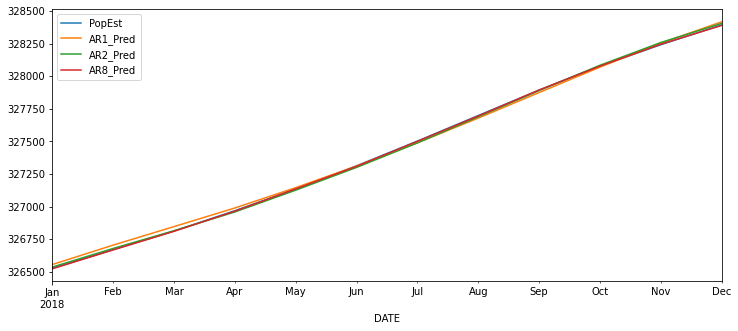

In [20]:
#Plotting the data
test['PopEst'].plot(figsize=(12,5), legend = True);
pred.plot(legend=True);
pred2.plot(legend=True);
pred3.plot(legend=True);

In [21]:
#Forcasting on whole data 
model2 = AR(data['PopEst'])
AR_model2 = model2.fit()
forecast_values = AR_model2.predict(start = len(data), end = len(data)+12).rename('Forecast')

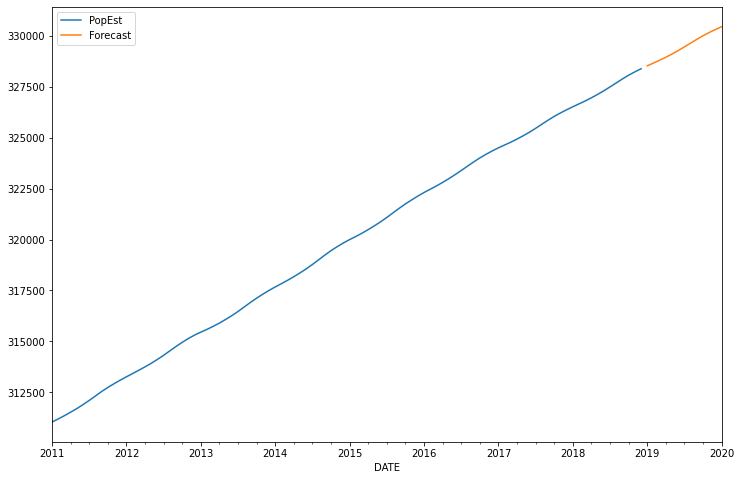

In [22]:
#Plotting the data
data['PopEst'].plot(figsize = (12,8), legend = True);
forecast_values.plot(legend = True);